In [135]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import chain
import math
from scipy.misc import derivative
from sklearn.decomposition import TruncatedSVD
from scipy.optimize import differential_evolution
import random
import statistics

from scipy.optimize import minimize
%matplotlib inline

Задание 1
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

* a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

* b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [17]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

In [18]:
#Скалярное произведение векторов
#np.dot(x,y)/math.sqrt(np.dot(x,x)*np.dot(y,y))
def Cosine (A, B):
    return np.dot(A, B) / math.sqrt(np.dot(A,A)) / math.sqrt(np.dot(B,B))

In [55]:
def best_pair(raitings):
    for i in range(len(raitings)):
        similarity=0.9
        con = chain(range(i), range(i+1, len(raitings)))
        for j in con:
            if (Cosine(raitings[i],raitings[j])<=similarity or Cosine(raitings[j],raitings[i])<=similarity): 
                similarity=min(Cosine(raitings[i],raitings[j]),Cosine(raitings[j],raitings[i]))
                best_pair=j
        print(i,' пользователь', 'наиболее похож на ',  best_pair, ' сходство - ', '%.3f' % similarity)

In [56]:
best_pair(raitings)

0  пользователь наиболее похож на  6  сходство -  0.727
1  пользователь наиболее похож на  7  сходство -  0.800
2  пользователь наиболее похож на  6  сходство -  0.676
3  пользователь наиболее похож на  4  сходство -  0.692
4  пользователь наиболее похож на  3  сходство -  0.692
5  пользователь наиболее похож на  6  сходство -  0.740
6  пользователь наиболее похож на  2  сходство -  0.676
7  пользователь наиболее похож на  2  сходство -  0.763
8  пользователь наиболее похож на  3  сходство -  0.777
9  пользователь наиболее похож на  6  сходство -  0.792


In [72]:
def func_svd(raitings,i):
    svd = TruncatedSVD(n_components=i)
    raitings_reduced = svd.fit_transform(raitings)
    return raitings_reduced

In [75]:
raitings_5=func_svd(raitings,5)
best_pair(raitings_5)  

0  пользователь наиболее похож на  5  сходство -  0.754
1  пользователь наиболее похож на  9  сходство -  0.834
2  пользователь наиболее похож на  6  сходство -  0.678
3  пользователь наиболее похож на  4  сходство -  0.711
4  пользователь наиболее похож на  3  сходство -  0.711
5  пользователь наиболее похож на  0  сходство -  0.754
6  пользователь наиболее похож на  2  сходство -  0.678
7  пользователь наиболее похож на  2  сходство -  0.825
8  пользователь наиболее похож на  3  сходство -  0.790
9  пользователь наиболее похож на  6  сходство -  0.803


Вывод: Cжатие признаковых описаний пользователя с 15 фильмов до 5-ти признаков, сохранило схожесть почти всех пользователей(7 из 10)

Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

 $2⋅tan(sin(x)+cos(2⋅x+3))⋅(cos(x)−2⋅sin(2⋅x+3))⋅cos−2(sin(x)+cos(2⋅x+3))$

In [82]:
def f(x):
    return np.tan((np.sin(x) + np.cos(2*x +3)))**2
print(f'Значение первой производной функции: {derivative(f, dx = 1e-6, x0=1.0, n=1)}')

Значение первой производной функции: 55.3859176464222


Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.

In [91]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [92]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [93]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

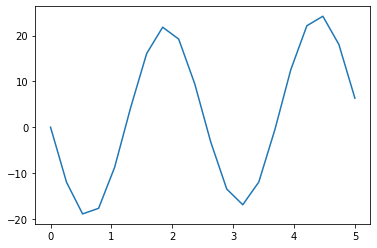

In [94]:
plt.plot(x, fx)
plt.show()

In [119]:
def error(params):
    error=0
    for i in range(len(x)):
        error=error+np.abs(fx[i] - f(x[i], params[0], params[1]))
        return error

In [120]:
bounds = [(-100, 100), (-100, 100)]
result = differential_evolution(error, bounds)
result

     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 63
     nit: 1
 success: True
       x: array([-73.42075465,  69.17896657])

In [122]:
params=[-73.42075465,  69.17896657]
error(params)

0.0

Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних

In [144]:
elements = range(20)
probabilities = [0.05]*20
list_means=[]
for i in range(1000): 
    data=np.random.choice(elements, 50, p=probabilities)
    list_means.append(statistics.mean(data))

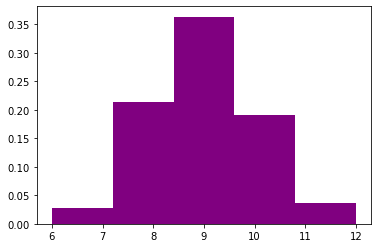

In [145]:
plt.hist(list_means, 5, density=True,color='purple')
plt.show()

Задание 5

Найдите собственные значения и собственные вектора матрицы (на python):

In [146]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [147]:
w, v = np.linalg.eig(m)

In [148]:
for i in range(len(w)):
    print('Собственное значение ' + str(w[i]))
    print('Собственный вектор ' + str(v[:,i]))

Собственное значение 3.0000000000000004
Собственный вектор [0.89442719 0.4472136 ]
Собственное значение -0.9999999999999996
Собственный вектор [-0.89442719  0.4472136 ]
